In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
df=pd.read_csv('/Users/lilexin/Desktop/Project 2/project2 raw data/adoNY_c_f.csv')

In [3]:
df.head(5)

,RECNUM,SEX,AGYSPNDS,AgeAtAdopt,ChildRace,BioMomAgeAtBirth,MOMARRD,AdoptMomAge,AdoptDadAge,ADPFAMST,MomRace,DadRace,Transracial
0,10115515140,2,2,0,1,20.0,1.0,33.0,33.0,1.0,1,1,0
1,10185923110,1,2,1,2,29.0,2.0,45.0,54.0,1.0,1,1,1
2,10199738080,2,2,0,1,24.0,2.0,36.0,45.0,1.0,1,1,0
3,10206906020,2,2,0,99,28.0,2.0,41.0,44.0,1.0,1,1,9
4,10286352150,1,2,1,99,36.0,2.0,32.0,32.0,1.0,1,1,9


1. RECNUM: record number
2. SEX: child sex 1-male 2-female
3. AGYSPNDS: child special needs, 0-not applicable, 1-yes, 2-no, 3-unable to determin
4. AgeAtAdopt: child’s age on date of adoption
5. ChildRace: race of child as one variable, 1-White, 2-Black, 3-AmInd, 4-Asian, 5-HawaiiPI, 6-More than One Race, 7-Hispanic Origin
6. BioMomAgeAtBirth: biological mother’s age on date of child’s birth
7. MOMARRD: biological mother married, 0-not applicable, 1-yes, 2-no, 3-unable to determine
8. AdoptMomAge: adoptive mother’s age on date of adoption
9. AdoptDadAge: adoptive father’s age on date of adoption
10. ADPFAMST: adoptive family structure, 0-not applicable, 1-married couple, 2-unmarried couple, 3-single female, 4-single male, 5-unable to determine
11. MomRace: race of adoptive mother as one variable, 1-White, 2-Black, 3-AmInd, 4-Asian, 5-HawaiiPI, 6-More than One Race, 7-Hispanic Origin
12. DadRace: race of adoptive father as one variable, 1-White, 2-Black, 3-AmInd, 4-Asian, 5-HawaiiPI, 6-More than One Race, 7-Hispanic Origin
13. Transracial: transracial adoption, 0-not transracial, 1-child not White + parent White, 2-child White + parent not White, 3-other transracial, 9-insufficient race info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 13 columns):
RECNUM              1933 non-null int64
SEX                 1933 non-null int64
AGYSPNDS            1933 non-null int64
AgeAtAdopt          1933 non-null int64
ChildRace           1933 non-null int64
BioMomAgeAtBirth    1903 non-null float64
MOMARRD             1890 non-null float64
AdoptMomAge         1890 non-null float64
AdoptDadAge         946 non-null float64
ADPFAMST            1890 non-null float64
MomRace             1933 non-null int64
DadRace             1933 non-null int64
Transracial         1933 non-null int64
dtypes: float64(5), int64(8)
memory usage: 196.4 KB


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
def data_glimps(Variable,color,kind):
    fig = plt.figure(figsize=(8,3))
    ax = fig.gca()
    df.groupby([Variable]).size().plot(kind=kind,ax=ax,color=color)
    plt.show()
    

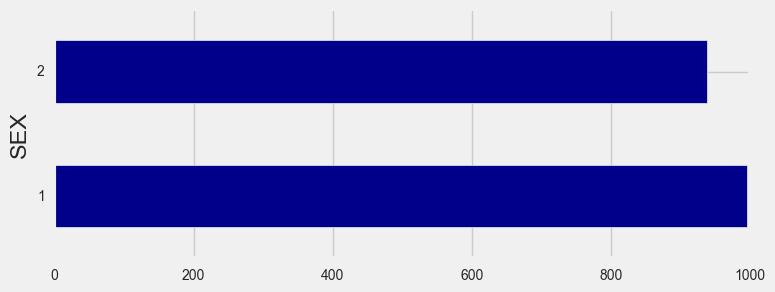

In [7]:
data_glimps('SEX','darkblue','Barh')

In [8]:
df['SEX']=df['SEX'].apply(lambda x: 1 if x==1 else 0)

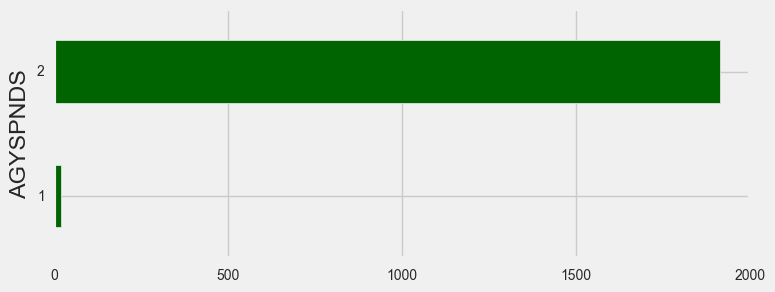

In [9]:
data_glimps('AGYSPNDS','darkgreen','barh')
#acording to the index  and info above, this variable have no missing obs, so we can turn it into a dummy variable

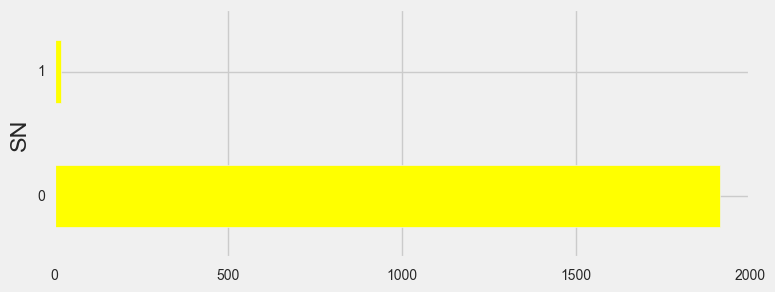

,RECNUM,SEX,AgeAtAdopt,ChildRace,BioMomAgeAtBirth,MOMARRD,AdoptMomAge,AdoptDadAge,ADPFAMST,MomRace,DadRace,Transracial,SN
0,10115515140,0,0,1,20.0,1.0,33.0,33.0,1.0,1,1,0,0
1,10185923110,1,1,2,29.0,2.0,45.0,54.0,1.0,1,1,1,0
2,10199738080,0,0,1,24.0,2.0,36.0,45.0,1.0,1,1,0,0
3,10206906020,0,0,99,28.0,2.0,41.0,44.0,1.0,1,1,9,0
4,10286352150,1,1,99,36.0,2.0,32.0,32.0,1.0,1,1,9,0
5,10291477140,0,0,99,23.0,2.0,43.0,39.0,1.0,1,1,9,0
6,10291478120,1,0,99,23.0,2.0,43.0,39.0,1.0,1,1,9,0
7,10302822130,1,0,1,24.0,2.0,60.0,65.0,1.0,1,1,0,0
8,10330723240,1,0,99,22.0,2.0,50.0,52.0,1.0,1,1,9,0
9,10614847090,0,0,1,28.0,2.0,47.0,42.0,1.0,1,1,0,0


In [10]:
df['SN']=(df['AGYSPNDS']%2)
data_glimps('SN','yellow','barh')
df.drop(['AGYSPNDS'],axis=1)

Finish the cleaning of SN

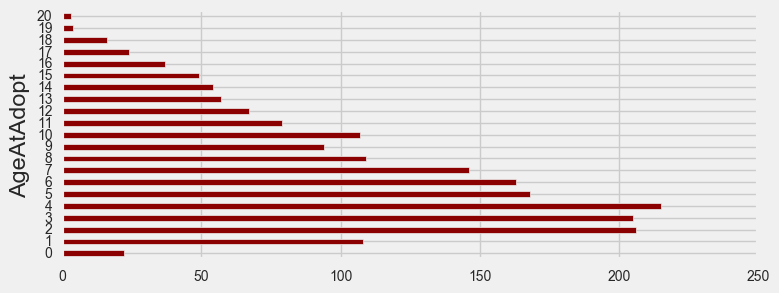

In [11]:
data_glimps('AgeAtAdopt','darkred','barh')

In [12]:
age=df['AgeAtAdopt']
df['std_age_at_adopt']=(age-np.mean(age))/np.std(age)


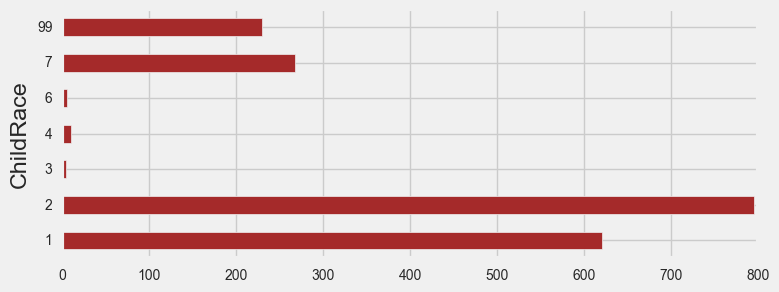

In [13]:
data_glimps('ChildRace','brown','barh')

Two steps to clean this variabl:1.separate it into 6 dummies.
                                2.translate '99' into Nan

In [14]:
df['white']=df['ChildRace']
df['black']=df['ChildRace']
df['amid']=df['ChildRace']
df['asian']=df['ChildRace']
df['hawaii']=df['ChildRace']
df['mixed']=df['ChildRace']
df['hispanic']=df['ChildRace']



In [15]:
def get_white_dummy(x):
    if x==1:
        x=1
    elif x==99:
        x='Nan'
    else:
        x=0
    return x
    

df['white']=df['white'].apply(lambda x: get_white_dummy(x))

def get_black_dummy(x):
    if x==2:
        x=1
    elif x==99:
        x='Nan'
    else:
        x=0
    return x
    

df['black']=df['black'].apply(lambda x: get_black_dummy(x))

def get_amid_dummy(x):
    if x==3:
        x=1
    elif x==99:
        x='Nan'
    else:
        x=0
    return x
    

df['amid']=df['amid'].apply(lambda x: get_amid_dummy(x))

def get_asian_dummy(x):
    if x==4:
        x=1
    elif x==99:
        x='Nan'
    else:
        x=0
    return x
    

df['asian']=df['asian'].apply(lambda x: get_asian_dummy(x))

def get_hawaii_dummy(x):
    if x==5:
        x=1
    elif x==99:
        x='Nan'
    else:
        x=0
    return x
    

df['hawaii']=df['hawaii'].apply(lambda x: get_hawaii_dummy(x))

def get_mixed_dummy(x):
    if x==6:
        x=1
    elif x==99:
        x='Nan'
    else:
        x=0
    return x
    

df['mixed']=df['mixed'].apply(lambda x: get_mixed_dummy(x))

def get_hispanic_dummy(x):
    if x==7:
        x=1
    elif x==99:
        x='Nan'
    else:
        x=0
    return x
    

df['hispanic']=df['hispanic'].apply(lambda x: get_hispanic_dummy(x))

In [16]:
df.tail()

,RECNUM,SEX,AGYSPNDS,AgeAtAdopt,ChildRace,BioMomAgeAtBirth,MOMARRD,AdoptMomAge,AdoptDadAge,ADPFAMST,...,Transracial,SN,std_age_at_adopt,white,black,amid,asian,hawaii,mixed,hispanic
1928,262695000000,1,2,7,2,39.0,2.0,65.0,NaN,3.0,...,0,0,0.068809,0,1,0,0,0,0,0
1929,262696000000,0,2,7,2,40.0,2.0,38.0,46.0,1.0,...,3,0,0.068809,0,1,0,0,0,0,0
1930,262696000000,0,2,8,99,39.0,2.0,38.0,46.0,1.0,...,9,0,0.298530,Nan,Nan,Nan,Nan,Nan,Nan,Nan
1931,262699000000,0,2,7,7,37.0,2.0,53.0,NaN,3.0,...,0,0,0.068809,0,0,0,0,0,0,1
1932,262699000000,1,2,7,7,38.0,2.0,53.0,NaN,3.0,...,0,0,0.068809,0,0,0,0,0,0,1


In [17]:
df=df.drop(['ChildRace'],axis=1)

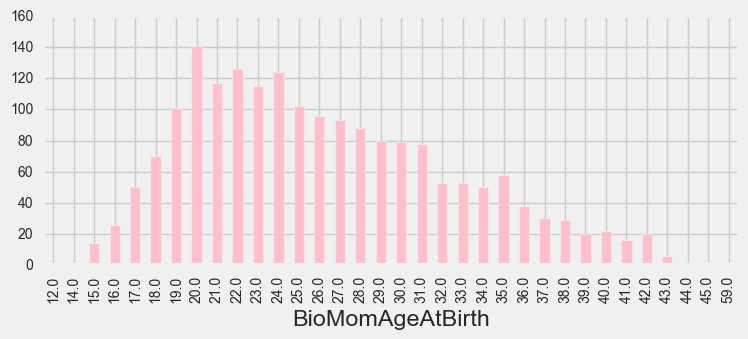

In [18]:
data_glimps('BioMomAgeAtBirth','pink','bar')


In [19]:
agebm=df['BioMomAgeAtBirth']
df['std_bio_mom_age']=(agebm-np.mean(agebm))/np.std(agebm)

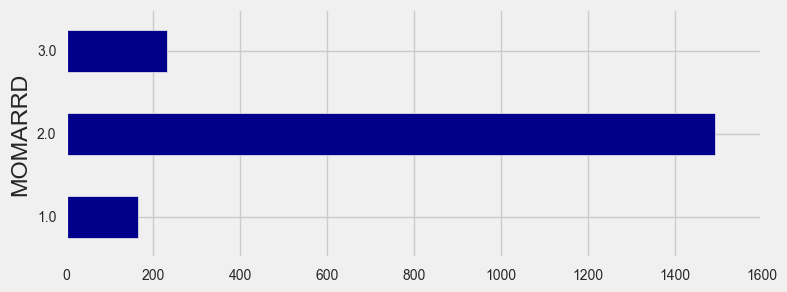

In [20]:
data_glimps('MOMARRD','darkblue','barh')

In [21]:
def get_bio_mom_marriage_dummy(x):
    if x==1:
        x=1
    elif x==3:
        x='Nan'
    else:
        x=0
    return x
    

df['MOMARRD']=df['MOMARRD'].apply(lambda x: get_bio_mom_marriage_dummy(x))

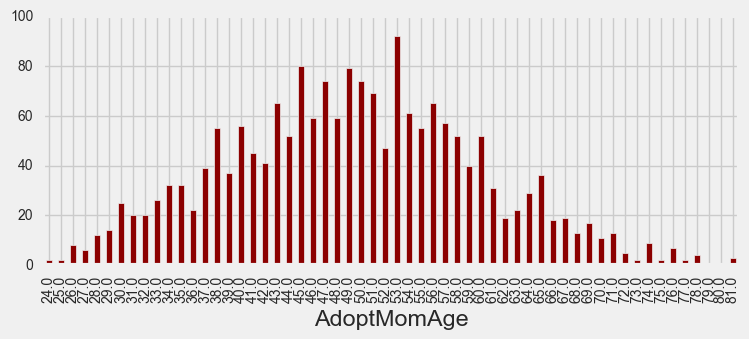

In [22]:
data_glimps('AdoptMomAge','darkred','bar')

In [23]:
ageam=df['AdoptMomAge']
df['std_adopt_mom_age']=(ageam-np.mean(ageam))/np.std(ageam)

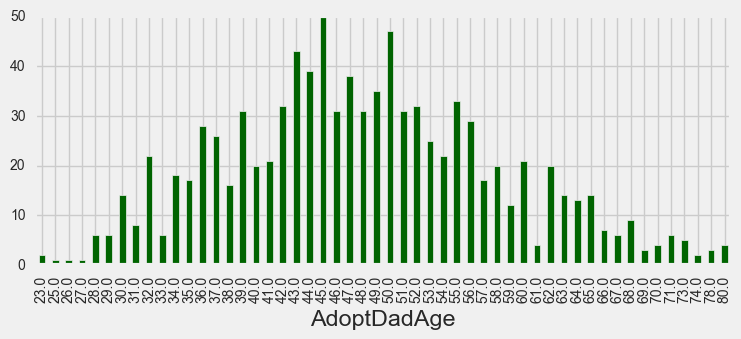

In [24]:
data_glimps('AdoptDadAge','darkgreen','bar')

In [25]:
agead=df['AdoptDadAge']
df['std_adopt_dad_age']=(agead-np.mean(agead))/np.std(agead)

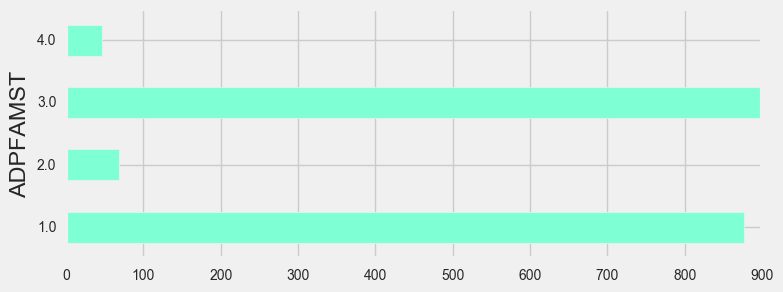

In [26]:
data_glimps('ADPFAMST','aquamarine','barh')

In [27]:
def get_couple_dummy(x):
    if x==1 or x==2:
        x=1
    
    else:
        x=0
    return x
    

df['if_couple']=df['ADPFAMST'].apply(lambda x: get_couple_dummy(x))

In [28]:
def single_female_dummy(x):
    if x==3 :
        x=1
    
    else:
        x=0
    return x
    

df['single_female']=df['ADPFAMST'].apply(lambda x: single_female_dummy(x))

In [29]:
def single_male_dummy(x):
    if x==4 :
        x=1
    
    else:
        x=0
    return x
    

df['single_male']=df['ADPFAMST'].apply(lambda x: single_male_dummy(x))

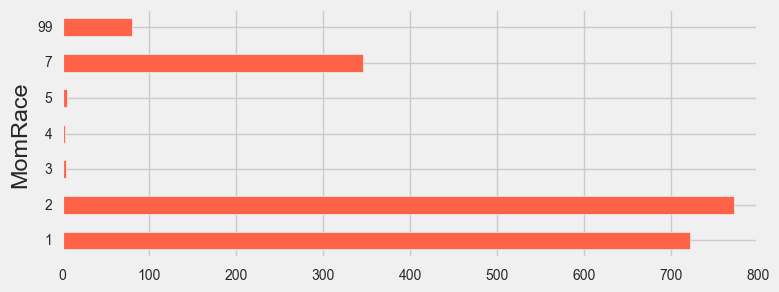

In [30]:
data_glimps('MomRace','tomato','barh')

In [31]:
df['mom_white']=df['MomRace'].apply(lambda x: get_white_dummy(x))
df['mom_black']=df['MomRace'].apply(lambda x: get_black_dummy(x))
df['mom_amid']=df['MomRace'].apply(lambda x: get_amid_dummy(x))
df['mom_asian']=df['MomRace'].apply(lambda x: get_asian_dummy(x))
df['mom_hawaii']=df['MomRace'].apply(lambda x: get_hawaii_dummy(x))
df['mom_mixed']=df['MomRace'].apply(lambda x: get_mixed_dummy(x))
df['mom_hispanic']=df['MomRace'].apply(lambda x: get_hispanic_dummy(x))

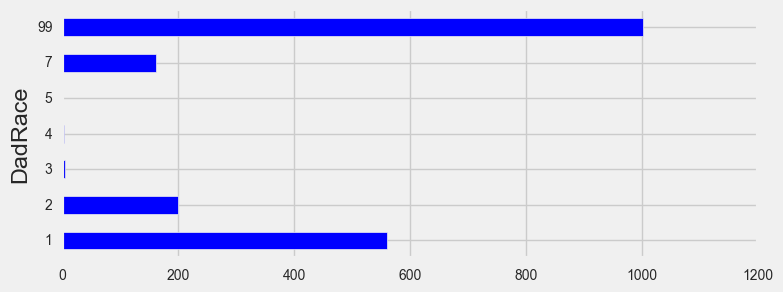

In [32]:
data_glimps('DadRace','blue','barh')

In [33]:
df['dad_white']=df['DadRace'].apply(lambda x: get_white_dummy(x))
df['dad_black']=df['DadRace'].apply(lambda x: get_black_dummy(x))
df['dad_amid']=df['DadRace'].apply(lambda x: get_amid_dummy(x))
df['dad_asian']=df['DadRace'].apply(lambda x: get_asian_dummy(x))
df['dad_hawaii']=df['DadRace'].apply(lambda x: get_hawaii_dummy(x))
df['dad_mixed']=df['DadRace'].apply(lambda x: get_mixed_dummy(x))
df['dad_hispanic']=df['DadRace'].apply(lambda x: get_hispanic_dummy(x))

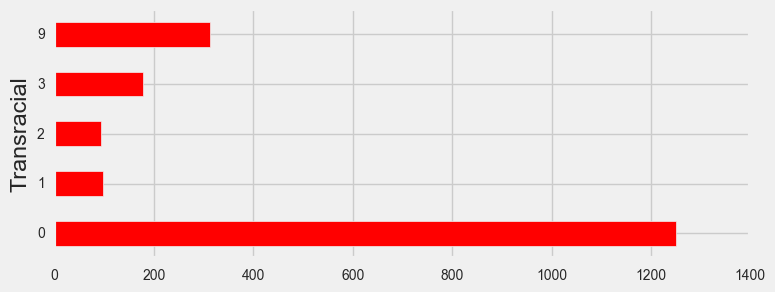

In [34]:
data_glimps('Transracial','red','barh')

In [35]:
def if_transracial_dummy(x):
    return 'Nan' if x==9 else 1 if x==1 or x== 2 or x ==3  else 0
df['transracial_dummy']=df['Transracial'].apply(lambda x: if_transracial_dummy(x))

In [36]:
df.describe().T

/Users/lilexin/anaconda2/envs/econ/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
RECNUM,1933.0,2.465849e+11,5.383135e+10,1.011552e+10,2.521900e+11,2.611140e+11,2.618100e+11,2.626990e+11
SEX,1933.0,5.147439e-01,4.999119e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
AGYSPNDS,1933.0,1.989653e+00,1.012169e-01,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
AgeAtAdopt,1933.0,6.700466e+00,4.354240e+00,0.000000e+00,3.000000e+00,6.000000e+00,1.000000e+01,2.000000e+01
BioMomAgeAtBirth,1903.0,2.622176e+01,6.436882e+00,1.200000e+01,NaN,NaN,NaN,5.900000e+01
AdoptMomAge,1890.0,4.934709e+01,1.057095e+01,2.400000e+01,NaN,NaN,NaN,8.100000e+01
AdoptDadAge,946.0,4.806871e+01,1.024434e+01,2.300000e+01,NaN,NaN,NaN,8.000000e+01
ADPFAMST,1890.0,2.060317e+00,1.017352e+00,1.000000e+00,NaN,NaN,NaN,4.000000e+00
MomRace,1933.0,6.550440e+00,1.933330e+01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,9.900000e+01
DadRace,1933.0,5.241904e+01,4.836145e+01,1.000000e+00,1.000000e+00,9.900000e+01,9.900000e+01,9.900000e+01


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 42 columns):
RECNUM               1933 non-null int64
SEX                  1933 non-null int64
AGYSPNDS             1933 non-null int64
AgeAtAdopt           1933 non-null int64
BioMomAgeAtBirth     1903 non-null float64
MOMARRD              1933 non-null object
AdoptMomAge          1890 non-null float64
AdoptDadAge          946 non-null float64
ADPFAMST             1890 non-null float64
MomRace              1933 non-null int64
DadRace              1933 non-null int64
Transracial          1933 non-null int64
SN                   1933 non-null int64
std_age_at_adopt     1933 non-null float64
white                1933 non-null object
black                1933 non-null object
amid                 1933 non-null object
asian                1933 non-null object
hawaii               1933 non-null object
mixed                1933 non-null object
hispanic             1933 non-null object
std_bio_mom_age

## If the age at adopt is related to other variables?


In [38]:
df2=df.drop(['RECNUM','AGYSPNDS','AdoptMomAge','AdoptDadAge','MomRace','DadRace','Transracial','std_age_at_adopt','std_bio_mom_age','std_adopt_mom_age','std_adopt_dad_age'],axis=1)

In [39]:
df2.groupby('SEX').mean()

,AgeAtAdopt,BioMomAgeAtBirth,ADPFAMST,SN,if_couple,single_female,single_male
SEX,,,,,,,
0,6.639659,26.189189,2.103712,0.009595,0.463753,0.496802,0.015991
1,6.757789,26.252556,2.019507,0.011055,0.513568,0.433166,0.032161


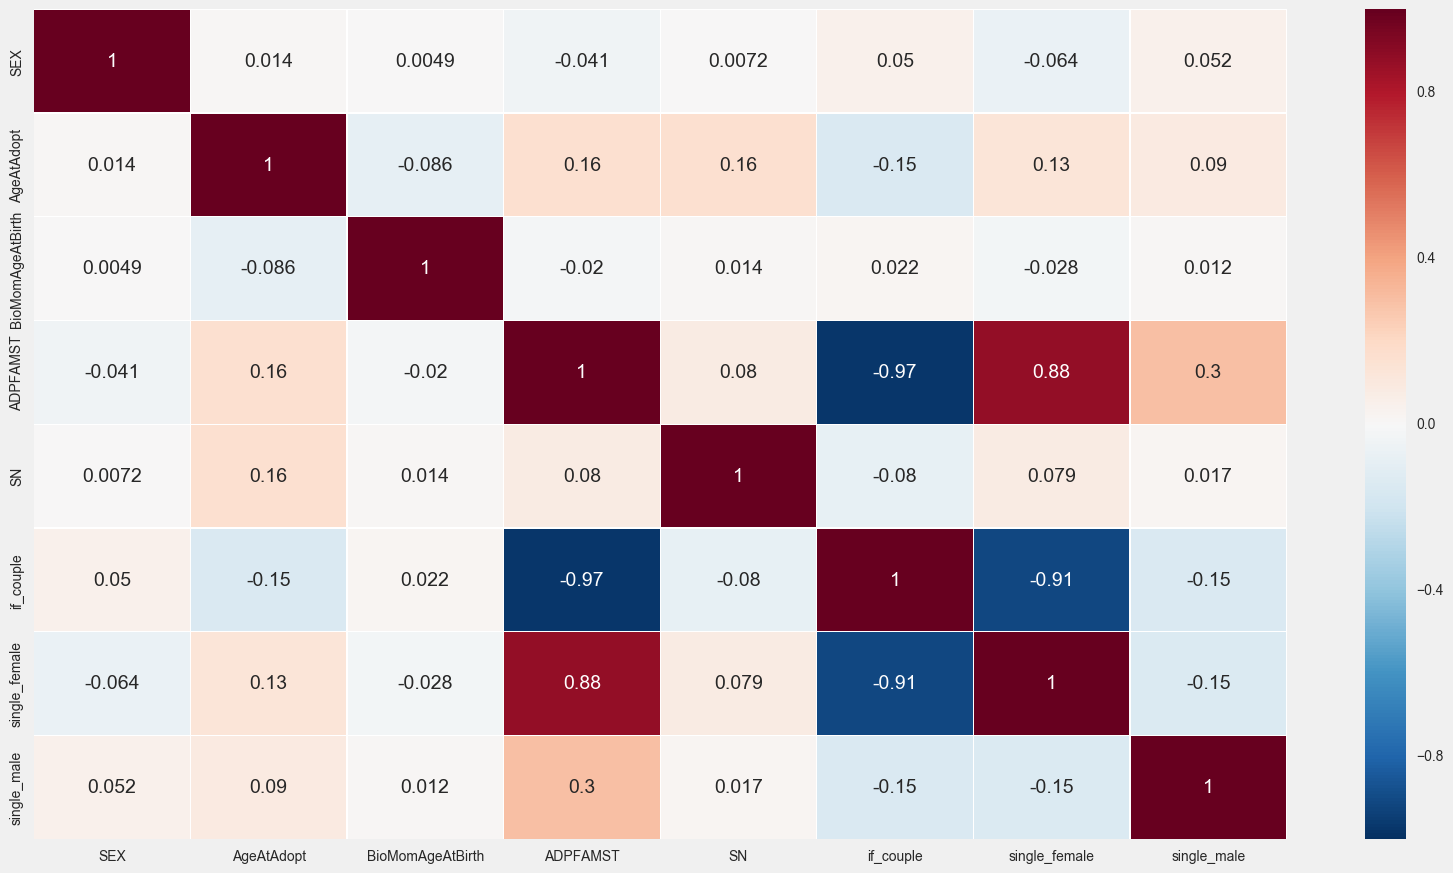

In [40]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(df2.corr(), annot=True, linewidths=.15, ax=ax)
plt.show()

In [41]:
from patsy import dmatrices
import statsmodels.formula.api as smf
import patsy
from sklearn.cross_validation import train_test_split

In [42]:
y, x = patsy.dmatrices("AgeAtAdopt ~ SEX+BioMomAgeAtBirth +ADPFAMST+SN+if_couple+single_male+single_female -1", data=df2, return_type="dataframe")
y = np.ravel(y)
print (y.shape)
print ("\n=====\n")
print (x.shape)

(1864,)

=====

(1864, 7)


In [43]:
from sklearn import linear_model

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)
lm1 = linear_model.LinearRegression()
model1 = lm1.fit(xtrain, ytrain)

In [45]:
print ("R^2: %.3f" % (model1.score(xtrain, ytrain)))
print ("Coefficients:", model1.coef_)
print ("Intercept: %.3f" % (model1.intercept_))

R^2: 0.055
('Coefficients:', array([ 0.23336041, -0.05007605, -0.22704751,  6.63162423, -1.46584682,
        1.35590302,  0.1099438 ]))
Intercept: 8.863


In [46]:
predictions1 = lm1.predict(xtest)
predictions1.shape

(373,)

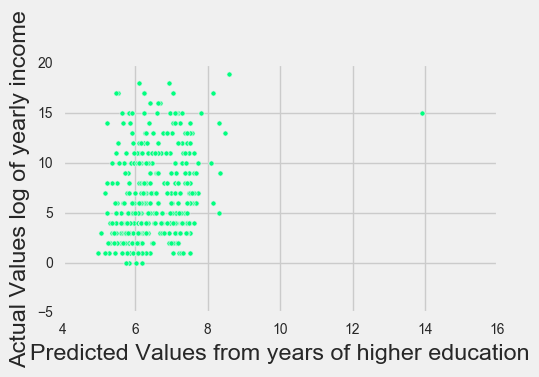

('MSE:', 17.302385938362079)


In [47]:
fig = plt.figure(figsize=(5,3))
plt.scatter(predictions1, ytest, s=14, c='springgreen', marker='o')
plt.xlabel("Predicted Values from years of higher education")
plt.ylabel("Actual Values log of yearly income")
plt.show()

print ("MSE:", mean_squared_error(ytest, predictions1))

In [48]:
lm_stats= smf.ols(formula='AgeAtAdopt ~ SEX+BioMomAgeAtBirth +ADPFAMST+SN+if_couple+single_male+single_female ', data=df2).fit()
print (lm_stats.summary())

                            OLS Regression Results                            
Dep. Variable:             AgeAtAdopt   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     18.60
Date:                Mon, 17 Apr 2017   Prob (F-statistic):           4.27e-21
Time:                        13:58:53   Log-Likelihood:                -5309.5
No. Observations:                1864   AIC:                         1.063e+04
Df Residuals:                    1857   BIC:                         1.067e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            7.2199      1.127  

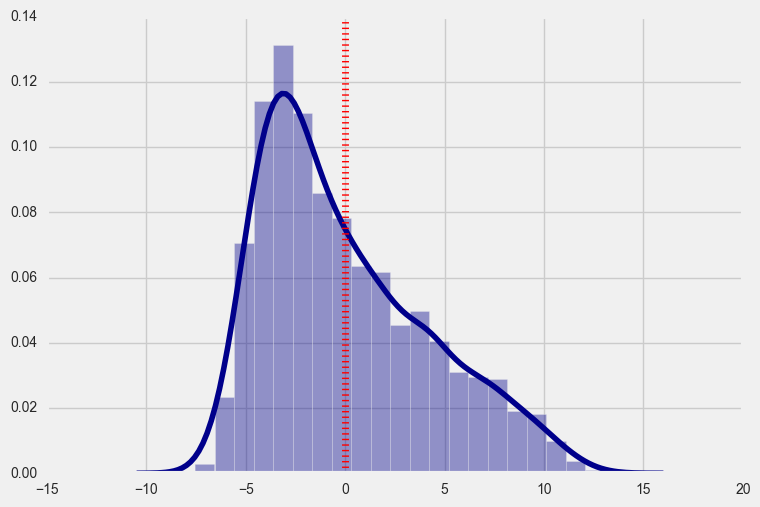

In [49]:
np.mean(lm_stats.resid)
sns.distplot(lm_stats.resid, color='darkblue')
plt.axvline(np.mean(lm_stats.resid), color='red', linestyle='dotted', linewidth=5)
plt.show()

In [50]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [51]:
ridge_alphas=np.logspace(0,5,200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(xtrain, ytrain)

print optimal_ridge.alpha_

1.0


In [53]:
from sklearn.cross_validation import cross_val_score

In [54]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, xtrain, ytrain, cv=10)

print (ridge_scores)
print (np.mean(ridge_scores))

[ 0.03390246  0.03661955  0.02780017  0.00819244  0.05137445  0.07514529
  0.08180904  0.04041371  0.00778503  0.0551354 ]
0.041817754237


In [55]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(xtrain, ytrain)

print (optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.00270652541769


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [56]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, xtrain, ytrain, cv=10)

print (lasso_scores)

[ 0.03409993  0.03410449  0.02487386  0.00896186  0.0527748   0.07607236
  0.08287086  0.04060326  0.00733757  0.05645544]


In [57]:
lasso.fit(xtrain, ytrain)


Lasso(alpha=0.0027065254176892907, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
lasso_coefs = pd.DataFrame({'variable':x.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
3,6.384048,6.384048,SN
4,1.135172,-1.135172,if_couple
5,0.913035,0.913035,single_male
0,0.226563,0.226563,SEX
1,0.049931,-0.049931,BioMomAgeAtBirth
2,0.000000,0.000000,ADPFAMST
6,0.000000,-0.000000,single_female


In [59]:
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=10, verbose=1)
optimal_enet.fit(xtrain, ytrain)

print (optimal_enet.alpha_)
print (optimal_enet.l1_ratio_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0025409071164
0.919183673469


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [60]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, xtrain, ytrain, cv=10)

print (enet_scores)
print (np.mean(enet_scores))

[ 0.0342466   0.03469495  0.02520682  0.00862552  0.05270651  0.07578012
  0.082281    0.04042261  0.00799492  0.05619442]
0.041815344938


In [61]:
ridge.fit(xtrain, ytrain)
enet.fit(xtrain, ytrain)
lasso.fit(xtrain, ytrain)

Lasso(alpha=0.0027065254176892907, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
ridge_resid = ytest - ridge.predict(xtest)
lasso_resid = ytest - lasso.predict(xtest)
enet_resid = ytest - enet.predict(xtest)

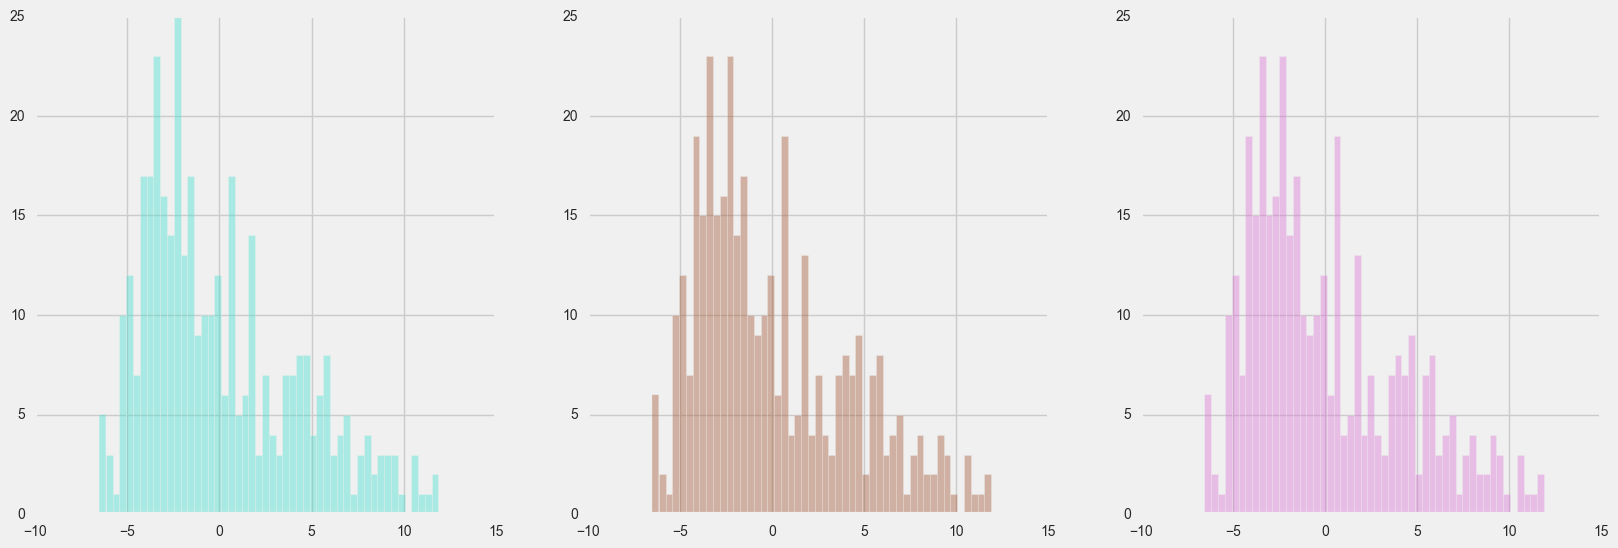

In [63]:
fig, axarr = plt.subplots(1, 3, figsize=(18, 6))

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='turquoise', ax=axarr[0], label='Ridge residuals')

sns.distplot(lasso_resid, bins=50, hist=True, kde=False, 
             color='sienna', ax=axarr[1], label='Lasso residuals')

sns.distplot(enet_resid, bins=50, hist=True, kde=False, 
             color='orchid', ax=axarr[2], label='ElasticNet residuals')

plt.show()

In [65]:
lm_sk = linear_model.LinearRegression()
model_sk = cross_val_score(lm_sk, xtrain, ytrain, cv=10)

In [66]:
print ytrain.mean()

6.63782696177


In [67]:
print (model_sk)

[ 0.0325143   0.03521936  0.02900716  0.00980649  0.04991749  0.07621022
  0.08480063  0.04158891  0.00357356  0.05544647]


## prediction on sex of children adopted

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
df_sex=df.drop(['RECNUM','AGYSPNDS','AdoptMomAge','AdoptDadAge','MomRace','DadRace','Transracial','std_age_at_adopt','std_bio_mom_age','std_adopt_mom_age','std_adopt_dad_age'],axis=1)

In [71]:
df_sex.head()


,SEX,AgeAtAdopt,BioMomAgeAtBirth,MOMARRD,ADPFAMST,SN,white,black,amid,asian,...,mom_mixed,mom_hispanic,dad_white,dad_black,dad_amid,dad_asian,dad_hawaii,dad_mixed,dad_hispanic,transracial_dummy
0,0,0,20.0,1,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,29.0,0,1.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,24.0,0,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,28.0,0,1.0,0,Nan,Nan,Nan,Nan,...,0,0,1,0,0,0,0,0,0,Nan
4,1,1,36.0,0,1.0,0,Nan,Nan,Nan,Nan,...,0,0,1,0,0,0,0,0,0,Nan


In [72]:
lgm=linear_model.LogisticRegression()


In [96]:
y1, x1 = patsy.dmatrices("SEX ~ AgeAtAdopt+BioMomAgeAtBirth +ADPFAMST+SN+if_couple+single_male+single_female -1", data=df2, return_type="dataframe")
y1 = np.ravel(y1)

In [100]:
x1train, x1test, y1train, y1test = train_test_split(x1, y1, test_size=0.10)

In [101]:
model = cross_val_score(lgm,x1train, y1train, cv=10)

In [102]:
print y1train.mean()
print model

0.519976147883
[ 0.56213018  0.55029586  0.54761905  0.53571429  0.49404762  0.49101796
  0.53293413  0.5508982   0.47904192  0.49700599]


In [103]:
Cs = np.logspace(0.0, 5.0, 20)

In [104]:
search_parameters = {"penalty": ['l1','l2'],"C": Cs,  "fit_intercept": [False, True], "class_weight": [None, "balanced"], "intercept_scaling": [2, 1], "solver":  ['liblinear']}



In [105]:
from sklearn.grid_search import GridSearchCV

In [106]:
estimator = GridSearchCV(lgm, search_parameters, cv=10, verbose=1, n_jobs=-1)

In [107]:
estimator.fit(x1train, y1train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2392 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:   10.1s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e+00,   1.83298e+00,   3.35982e+00,   6.15848e+00,
         1.12884e+01,   2.06914e+01,   3.79269e+01,   6.95193e+01,
         1.27427e+02,   2.33572e+02,   4.28133e+02,   7.84760e+02,
         1.43845e+03,   2.63665e+03,   4.83293e+03,   8.85867e+03,
         1.62378e+04,   2.97635e+04,   5.45559e+04,   1.00000e+05]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [109]:
lgm_best = estimator.best_estimator_

In [110]:
from sklearn.metrics import confusion_matrix

In [113]:
y1predict=estimator.predict(x1test)

confmat = confusion_matrix(y_true=y1test, y_pred=y1predict)
confmat

array([[54, 45],
       [42, 46]])

In [114]:
confusion = pd.DataFrame(confmat, index=['True_Label_0 Republican', 'True_Label_1 Democrat'],
                         columns=['Predict_Label_0 Republican', 'Predict_Label_1 Democrat'])

confusion

,Predict_Label_0 Republican,Predict_Label_1 Democrat
True_Label_0 Republican,54,45
True_Label_1 Democrat,42,46
